<a href="https://colab.research.google.com/github/Mithila101/email_spam_detecton/blob/main/spam_detection(all_algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [ ]:
print("Dataset Sample:")
print(df.head())

Dataset Sample:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

/tmp/ipython-input-2851929608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [ ]:
X = df['message']
y = df['label']

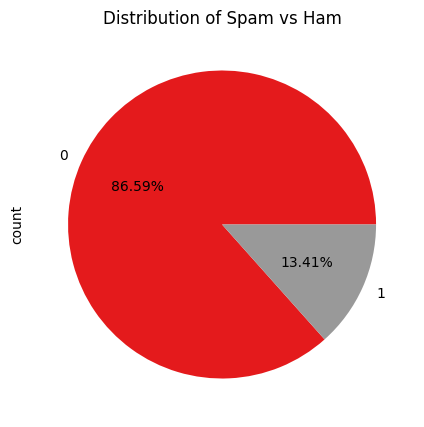

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Text Vectorization (TF-IDF)
# ===============================
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

🔹 Model: Decision Tree
Accuracy: 0.9659
Precision: 0.8784
Recall: 0.8667
F1-Score: 0.8725

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.88      0.87      0.87       150

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



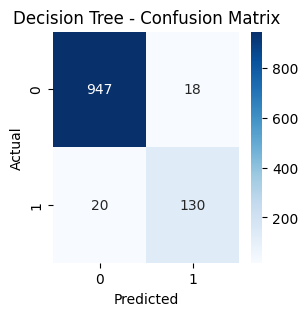

🔹 Model: KNN
Accuracy: 0.9202
Precision: 1.0000
Recall: 0.4067
F1-Score: 0.5782

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       965
           1       1.00      0.41      0.58       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.93      0.92      0.91      1115



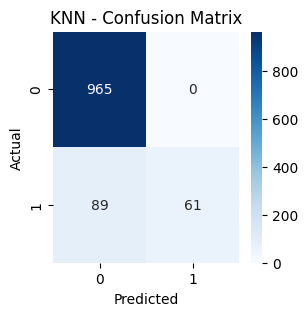

🔹 Model: Random Forest
Accuracy: 0.9794
Precision: 0.9922
Recall: 0.8533
F1-Score: 0.9176

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



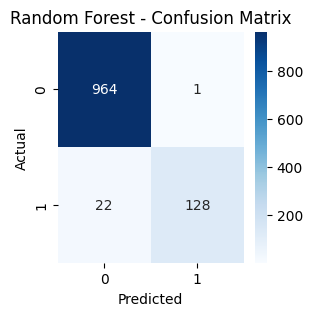

🔹 Model: Naive Bayes
Accuracy: 0.9785
Precision: 1.0000
Recall: 0.8400
F1-Score: 0.9130

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



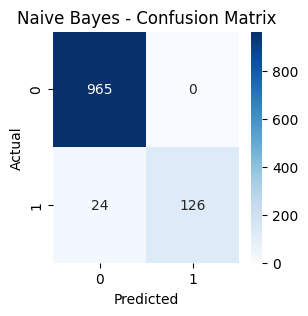

🔹 Model: Logistic Regression
Accuracy: 0.9641
Precision: 0.9741
Recall: 0.7533
F1-Score: 0.8496

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.75      0.85       150

    accuracy                           0.96      1115
   macro avg       0.97      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



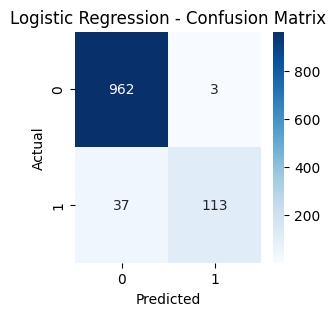

In [25]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print("="*60)
    print(f"🔹 Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



In [27]:
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)


Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.965919   0.878378  0.866667  0.872483
1                  KNN  0.920179   1.000000  0.406667  0.578199
2        Random Forest  0.979372   0.992248  0.853333  0.917563
3          Naive Bayes  0.978475   1.000000  0.840000  0.913043
4  Logistic Regression  0.964126   0.974138  0.753333  0.849624


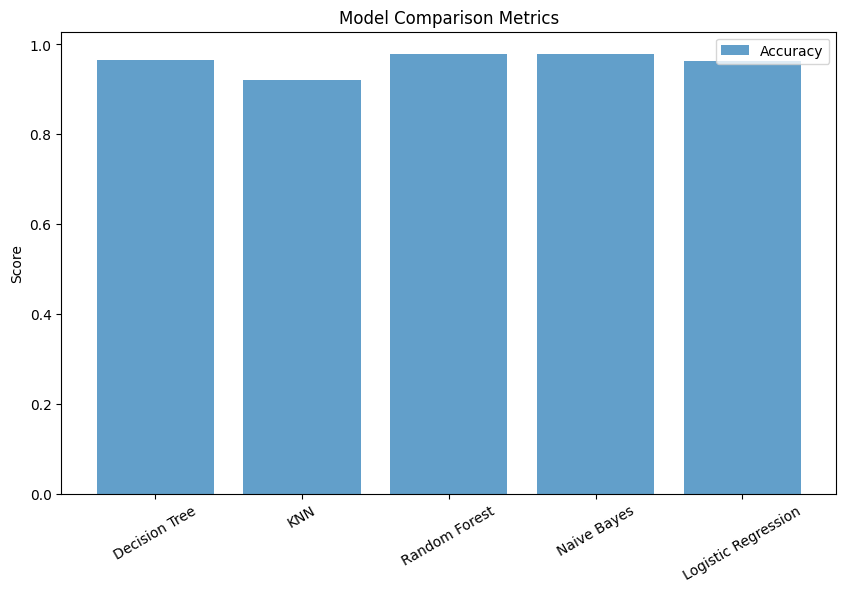

In [31]:
plt.figure(figsize=(10,6))
metrics = ['Accuracy']
for metric in metrics:
    plt.bar(results_df['Model'], results_df[metric], alpha=0.7, label=metric)

plt.title("Model Comparison Metrics")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.legend()
plt.show()